In [167]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

Hello and welcome to my notebook :) Here I'm gonna inspect and visualize **Top Women Chess Data**. Please note this notebook will be frequently updating. I hope so you will find an interesting content here. If you like this notebook you can let me know in comment or by upvoting. 
Enjoy!

## Loading Data

In [168]:
# Set path to data 
path = "../input/top-women-chess-players/top_women_chess_players_aug_2020.csv"

In [169]:
#Read data
data = pd.read_csv(path)

## Basic Information

In [171]:
data.sample(10)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
4453,910872,"Kolar, Jelena",SRB,F,1965.0,NaN,1989,1770.0,1967.0,NaN
65,14110911,"Ushenina, Anna",UKR,F,1985.0,GM,2416,2376.0,2387.0,NaN
6133,2508214,"O`Gorman, Alice",IRL,F,2000.0,NaN,1904,1714.0,1799.0,NaN
3768,3509176,"Reyes Avila, Susej",CUB,F,1989.0,WFM,2016,NaN,NaN,wi
5831,108103,"Fantini, Daniela",ARG,F,1981.0,WFM,1919,1982.0,1960.0,wi
3343,13704923,"Rysbayeva, Korlan",KAZ,F,1993.0,NaN,2035,2049.0,2065.0,wi
4880,30941822,"Lee, Alice",USA,F,2009.0,WCM,1967,NaN,NaN,NaN
1118,351369,"Pychova, Nela",CZE,F,1999.0,WFM,2159,2130.0,2159.0,NaN
3420,1106112,"Maculewicz, Angelika",POL,F,1975.0,NaN,2031,NaN,NaN,wi
2863,711454,"Menesi, Gizella",HUN,F,1973.0,NaN,2055,NaN,NaN,wi


In [172]:
data.describe()

,Fide id,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
count,8.553000e+03,8261.000000,8553.000000,3608.000000,3472.000000
mean,8.829011e+06,1985.291732,2005.102303,1931.680155,1925.155242
std,9.226777e+06,14.055386,137.146646,191.449272,188.556849
min,1.001450e+05,1920.000000,1801.000000,1224.000000,1159.000000
25%,2.119447e+06,1978.000000,1891.000000,1811.000000,1805.000000
50%,4.500539e+06,1988.000000,1998.000000,1921.000000,1919.000000
75%,1.360553e+07,1995.000000,2090.000000,2051.000000,2044.000000
max,7.360114e+07,2010.000000,2675.000000,2646.000000,2736.000000


## Data Analysing

At first see how much playar is active

In [173]:
np.array(data.Inactive_flag != "wi").sum()

2701

Let's analyse only active players

In [174]:
data = data[data.Inactive_flag != "wi"]

### Year of birth

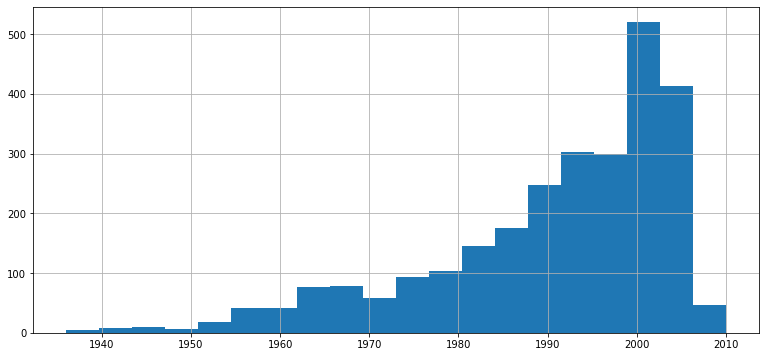

In [175]:
plt.figure(figsize=(13, 6))
data.Year_of_birth.hist(bins=20)

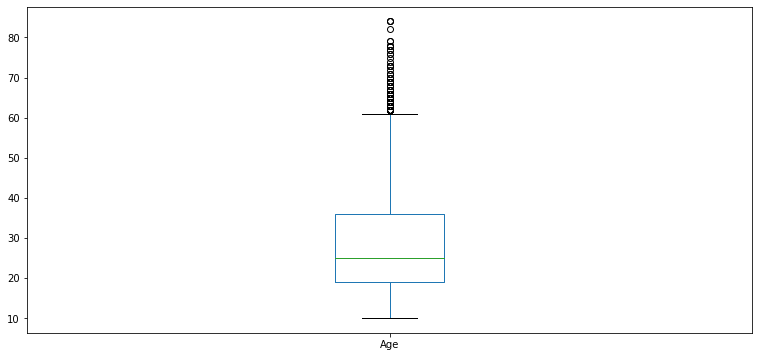

In [176]:
current_age = 2020
plt.figure(figsize=(13, 6))
data["Age"] = current_age - data.Year_of_birth
data.Age.plot.box()

We can spot some outliers in Age distribution

In [177]:
print("Median of age: ", data.Age.median())

Median of age:  25.0


## Federation 

In [178]:
federation_data = data.groupby("Federation").size().head(20)

In [179]:
federation_data = federation_data.sort_values(ascending=False)

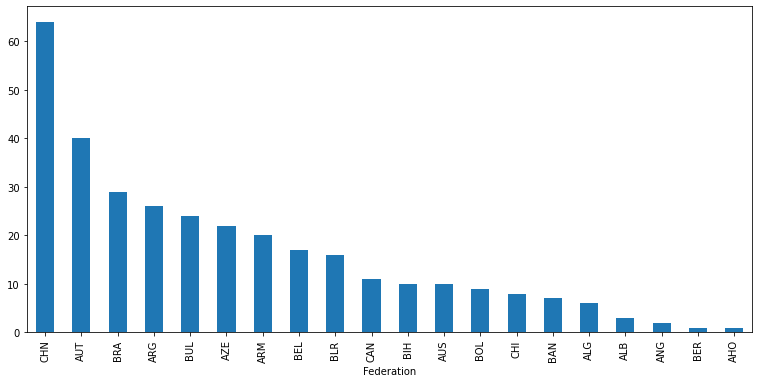

In [180]:
plt.figure(figsize=(13, 6))
plt.title("Active players by federation")
plt.ylabel("Count")
federation_data.plot.bar()

## Gender


Sure there is no need to analyse gender data :)

## Title

In chess we have four main classic titles such as:
#### Grand Master
The usual way to obtain the title is to achieve the required title norms over 27 or more games and a FIDE rating of 2500 or more.
#### International Master
The usual way to obtain the title is to achieve the required title norms over 27 or more games and a FIDE rating of 2400 or more.
#### FIDE Master
The usual way for a player to qualify for the FIDE Master title is by achieving an Elo rating of 2300 or more.
#### Candidate Master
The usual way for a player to qualify for the Candidate Master title is by achieving an Elo rating of 2200 or more.

In [181]:
data.Title.unique()

array(['GM', 'IM', 'WGM', 'FM', 'WFM', 'WIM', nan, 'WCM', 'CM'],
      dtype=object)

In [182]:
title_data = data.groupby("Title").size()

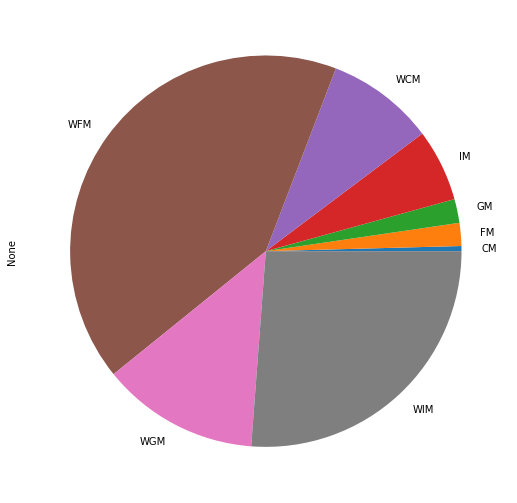

In [183]:
plt.figure(figsize=(9, 9))
title_data.plot.pie()

## Ratings!


No we are gonna analyse i think the most interesting data which is Ratings. At the begining let's look at standard rating!

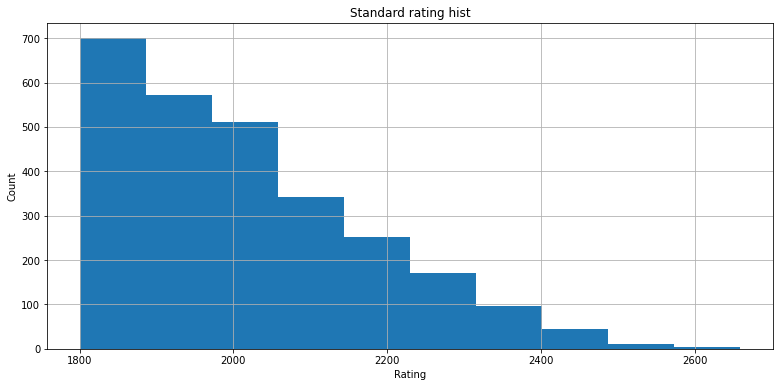

In [184]:
plt.figure(figsize=(13, 6))
plt.title("Standard rating hist")
plt.xlabel("Rating")
plt.ylabel("Count")
data.Standard_Rating.hist()

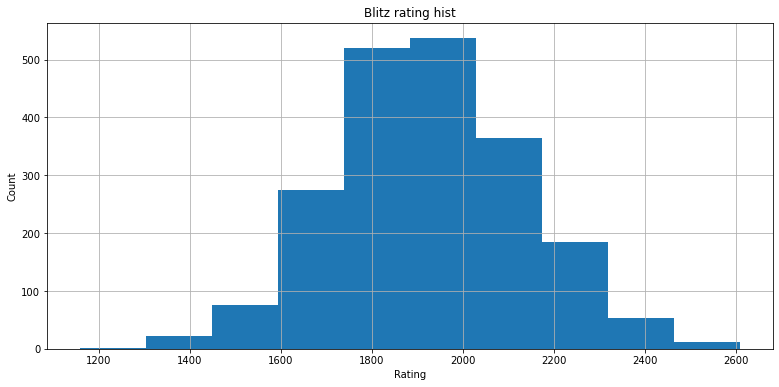

In [185]:
plt.figure(figsize=(13, 6))
plt.title("Blitz rating hist")
plt.xlabel("Rating")
plt.ylabel("Count")
data.Blitz_rating.hist()

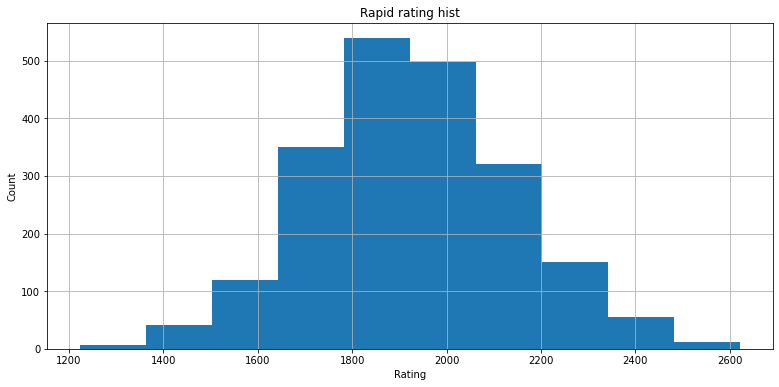

In [186]:
plt.figure(figsize=(13, 6))
plt.title("Rapid rating hist")
plt.xlabel("Rating")
plt.ylabel("Count")
data.Rapid_rating.hist()

In [187]:
srt_by_federation = data.groupby("Federation").Standard_Rating.mean()
srt_by_federation = srt_by_federation.sort_values(ascending=False)
srt_by_federation = srt_by_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


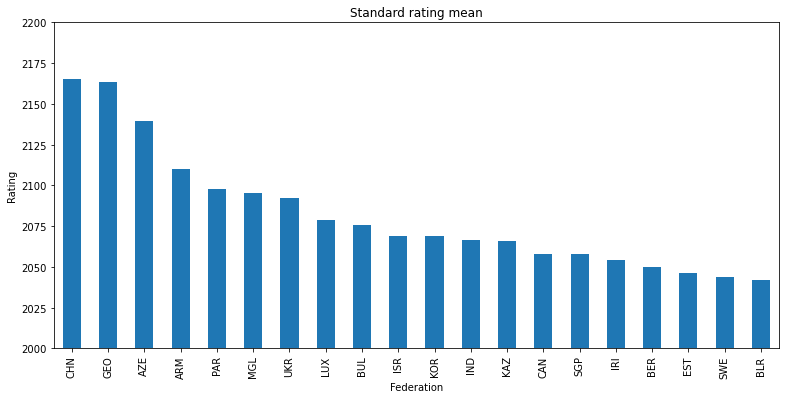

In [188]:
plt.figure(figsize=(13, 6))
plt.title("Standard rating mean")
plt.ylabel("Rating")
plt.axis([0,0,2000, 2200])
srt_by_federation.plot.bar()

In [189]:
brt_by_federation = data.groupby("Federation").Blitz_rating.mean()
brt_by_federation = brt_by_federation.sort_values(ascending=False)
brt_by_federation = brt_by_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


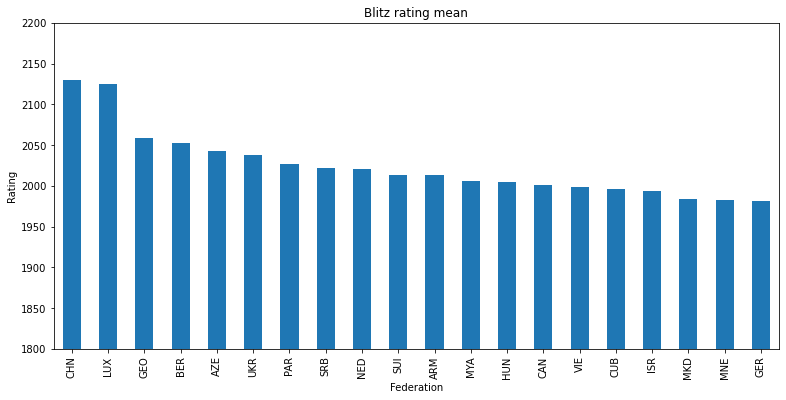

In [190]:
plt.figure(figsize=(13, 6))
plt.title("Blitz rating mean")
plt.ylabel("Rating")
plt.axis([0,0,1800, 2200])
brt_by_federation.plot.bar()

In [191]:
rrt_by_federation = data.groupby("Federation").Rapid_rating.mean()
rrt_by_federation = rrt_by_federation.sort_values(ascending=False)
rrt_by_federation = rrt_by_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


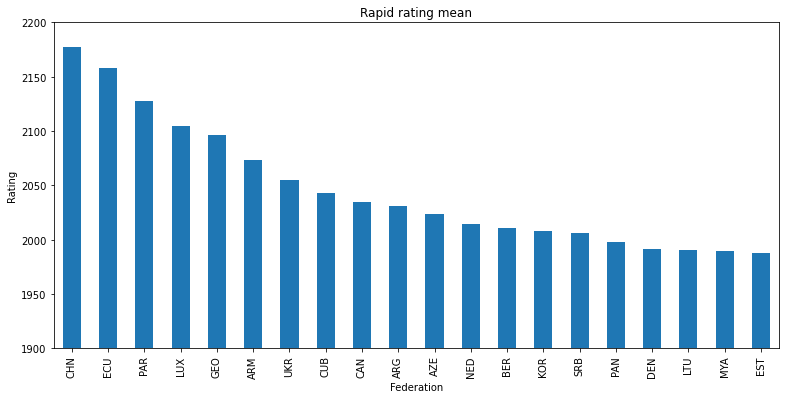

In [192]:
plt.figure(figsize=(13, 6))
plt.title("Rapid rating mean")
plt.ylabel("Rating")
plt.axis([0,0,1900, 2200])
rrt_by_federation.plot.bar()

In [193]:
srt_max_federation = data.groupby("Federation").Standard_Rating.max()
srt_max_federation = srt_max_federation.sort_values(ascending=False)
srt_max_federation = srt_max_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


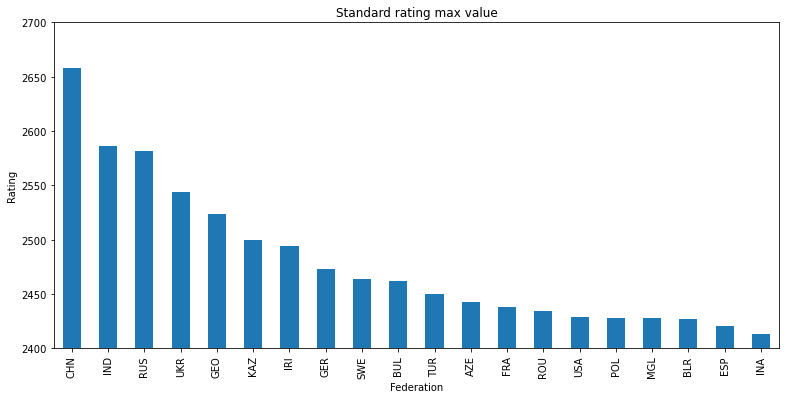

In [194]:
plt.figure(figsize=(13, 6))
plt.title("Standard rating max value")
plt.ylabel("Rating")
plt.axis([0,0,2400, 2700])
srt_max_federation.plot.bar()

In [195]:
brt_max_federation = data.groupby("Federation").Blitz_rating.max()
brt_max_federation = brt_max_federation.sort_values(ascending=False)
brt_max_federation = brt_max_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


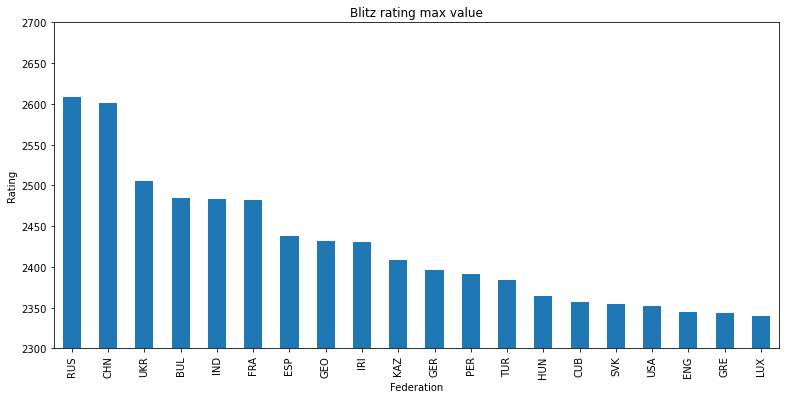

In [196]:
plt.figure(figsize=(13, 6))
plt.title("Blitz rating max value")
plt.ylabel("Rating")
plt.axis([0,0,2300, 2700])
brt_max_federation.plot.bar()

In [197]:
rrt_max_federation = data.groupby("Federation").Rapid_rating.max()
rrt_max_federation = rrt_max_federation.sort_values(ascending=False)
rrt_max_federation = rrt_max_federation.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


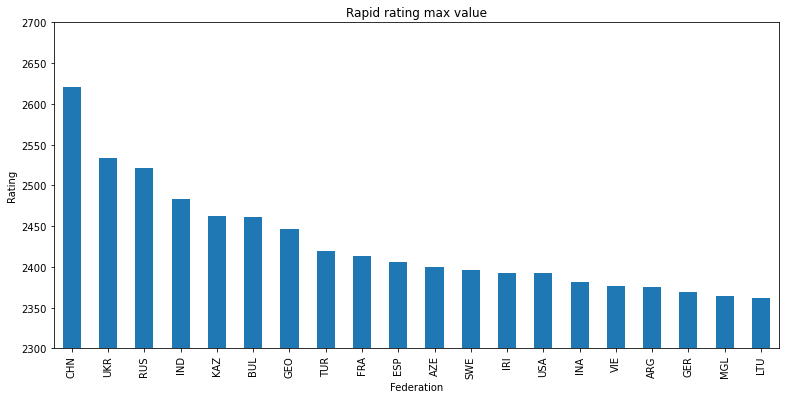

In [198]:
plt.figure(figsize=(13, 6))
plt.title("Rapid rating max value")
plt.ylabel("Rating")
plt.axis([0,0,2300, 2700])
rrt_max_federation.plot.bar()

In [199]:
rating_data = data[["Standard_Rating", "Blitz_rating", "Rapid_rating"]]

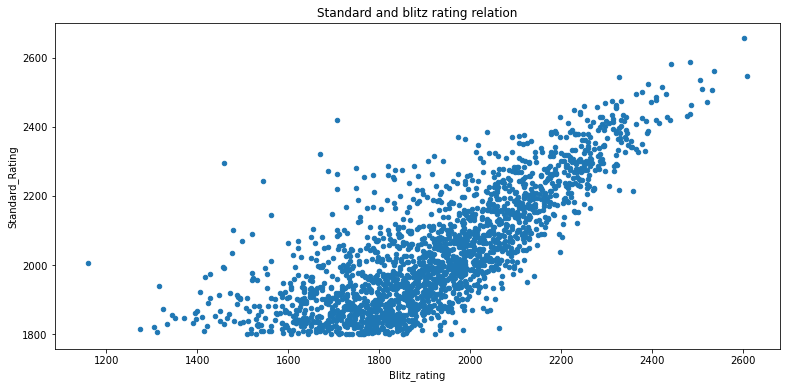

In [200]:
rating_data.plot.scatter(x="Blitz_rating", y="Standard_Rating", figsize=(13,6),title=("Standard and blitz rating relation"))

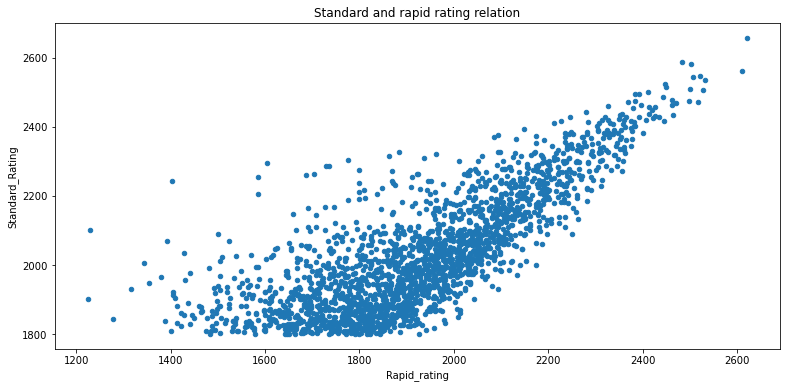

In [201]:
rating_data.plot.scatter(x="Rapid_rating", y="Standard_Rating", figsize=(13,6), title=("Standard and rapid rating relation"))

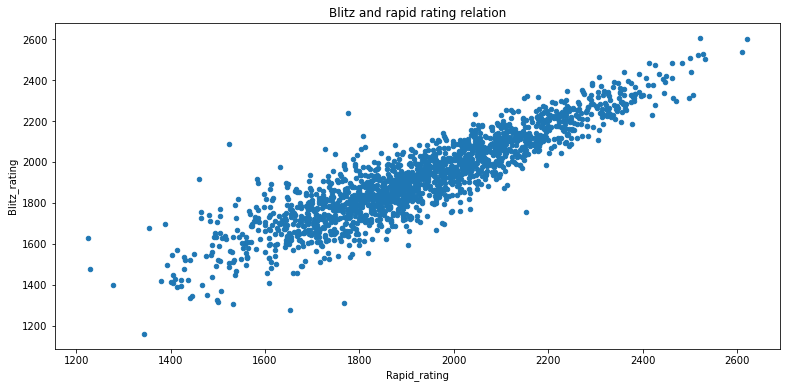

In [202]:
rating_data.plot.scatter(x="Rapid_rating", y="Blitz_rating", figsize=(13,6), title=("Blitz and rapid rating relation"))